In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = "climate_data.csv"
df = pd.read_csv(data)

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [6]:
df.fillna(method="ffill", inplace=True)

C:\Users\NonsoDev\AppData\Local\Temp\ipykernel_9776\173857299.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [7]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua And Barbuda',
    'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
    'Bhutan', 'Bolivia', 'Bosnia And Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
    'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
    'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
    'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
    'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
    'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
    'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
    'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
    'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos',
    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
    'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
    'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro',
    'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'Norway', 'Oman',
    'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
    'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
    'Saint Kitts And Nevis', 'Saint Lucia', 'Saint Vincent And The Grenadines',
    'Samoa', 'San Marino', 'Sao Tome And Principe', 'Saudi Arabia', 'Senegal',
    'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
    'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',
    'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
    'Tajikistan', 'Tanzania', 'Thailand', 'Timor Leste', 'Togo', 'Tonga',
    'Trinidad And Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine',
    'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
    'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'
]

In [8]:
countries_df = df[df["Country"].isin(countries)]

In [9]:
countries_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
3239,1838-04-01,13.008,2.586,Afghanistan
3240,1838-05-01,13.008,2.586,Afghanistan
3241,1838-06-01,23.950,2.510,Afghanistan
3242,1838-07-01,26.877,2.883,Afghanistan
3243,1838-08-01,24.938,2.992,Afghanistan
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [10]:
continents = [
    'Africa', 'Asia', 'Australia', 'Europe', 'North America', 'Oceania', 'South America'
]


In [11]:
continents_df = df[df["Country"].isin(continents)]


In [23]:

continents_df["dt"] =continents_df["dt"].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

C:\Users\NonsoDev\AppData\Local\Temp\ipykernel_9776\1707483801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continents_df["dt"] =continents_df["dt"].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))


In [24]:
continents_df.columns = ["dt","AverageTemperature",	"AverageTemperatureUncertainty","Continents"]

In [25]:
# use a facate grid to plot out every continent plot

import matplotlib.pyplot as plt

In [26]:
unique_continents = continents_df["Continents"].unique()

In [27]:
unique_continents_colour = plt.cm.Set2(range(len(unique_continents)))

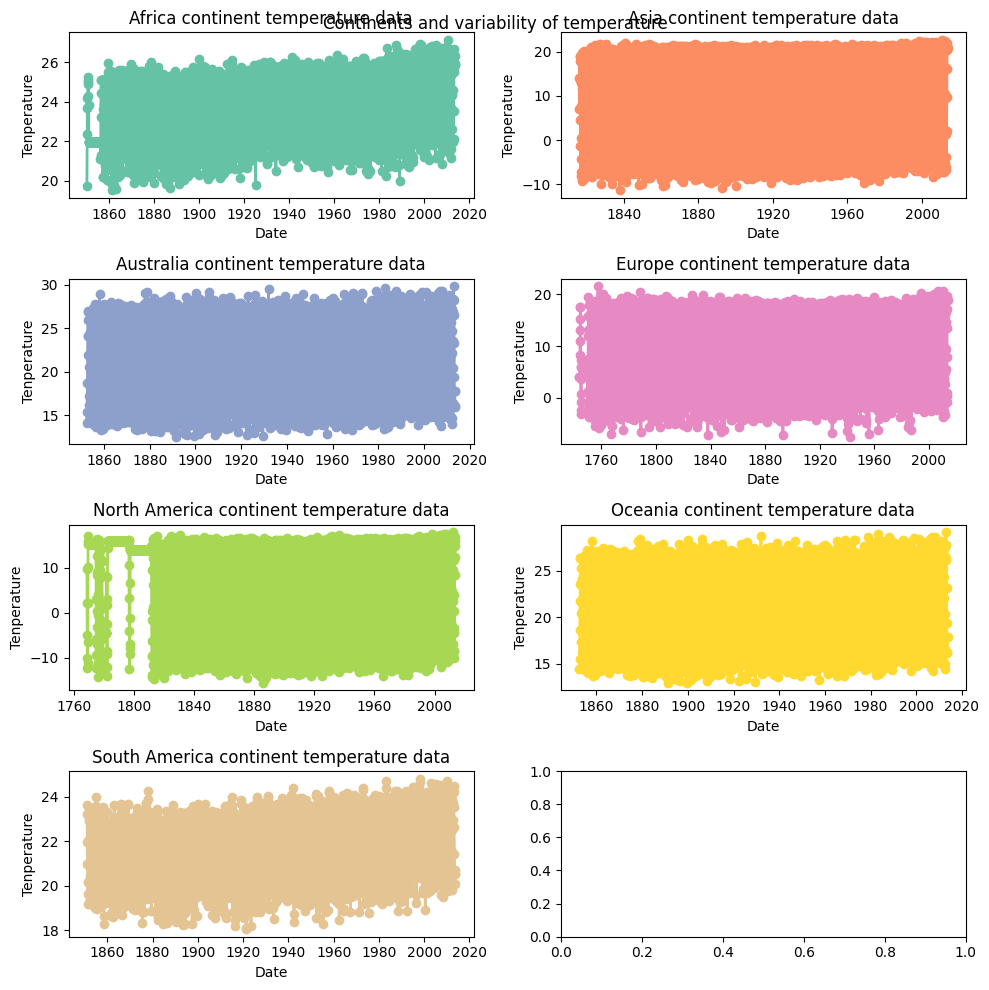

In [28]:
fig, axes = plt.subplots(nrows=math.ceil(len(unique_continents)/2), ncols=2, figsize=(10,10))
axes = axes.flatten()

for i, continent in enumerate(unique_continents):
    date = continents_df[continents_df["Continents"] == continent]["dt"]
    temp = continents_df[continents_df["Continents"] == continent]["AverageTemperature"]
    axes[i].plot(date, temp, marker='o', linestyle='-', color=unique_continents_colour[i], linewidth=2)
    axes[i].set_title(f"{continent} continent temperature data")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Tenperature")

plt.tight_layout()
plt.suptitle("Continents and variability of temperature")
plt.show()

In [29]:
# this seems to have so many datapoints, 
# it is too cluttered we are going to get the yearly avg temperature and see if that is better

continents_df.loc[:,"Year"] = continents_df["dt"].dt.to_period("Y")

C:\Users\NonsoDev\AppData\Local\Temp\ipykernel_9776\2885320239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continents_df.loc[:,"Year"] = continents_df["dt"].dt.to_period("Y")


In [30]:
continents_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Continents,Year
5345,1850-01-01,19.764,1.185,Africa,1850
5346,1850-02-01,22.393,1.188,Africa,1850
5347,1850-03-01,23.672,1.954,Africa,1850
5348,1850-04-01,24.197,1.364,Africa,1850
5349,1850-05-01,24.302,0.938,Africa,1850
...,...,...,...,...,...
486716,2013-05-01,21.416,0.168,South America,2013
486717,2013-06-01,20.734,0.225,South America,2013
486718,2013-07-01,20.076,0.167,South America,2013
486719,2013-08-01,20.541,0.248,South America,2013


In [31]:
continents_df_YEAR = continents_df.groupby(["Continents","Year"])["AverageTemperature"].mean()

In [32]:
continents_df_YEAR = continents_df_YEAR.reset_index()

In [33]:
continents_df_YEAR

,Continents,Year,AverageTemperature
0,Africa,1850,23.532417
1,Africa,1851,21.994000
2,Africa,1852,21.994000
3,Africa,1853,21.994000
4,Africa,1854,21.994000
...,...,...,...
1361,South America,2009,22.652583
1362,South America,2010,22.677333
1363,South America,2011,22.473000
1364,South America,2012,22.722583


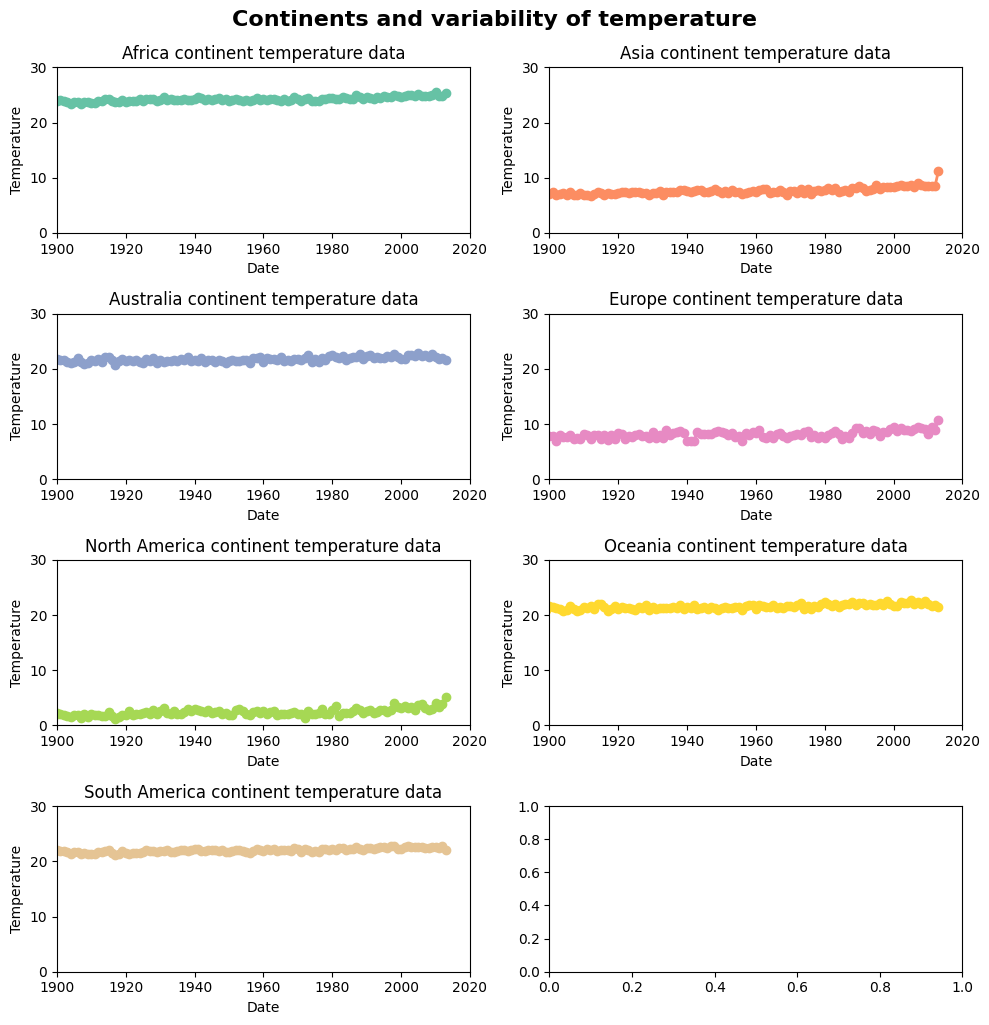

In [34]:
fig, axes = plt.subplots(nrows=math.ceil(len(unique_continents)/2), ncols=2, figsize=(10,10))
axes = axes.flatten()

for i, continent in enumerate(unique_continents):
    date = continents_df_YEAR[continents_df_YEAR["Continents"] == continent]["Year"]
    temp = continents_df_YEAR[continents_df_YEAR["Continents"] == continent]["AverageTemperature"]
    date = date.astype(str).astype(float)
    axes[i].plot(date, temp, marker='o', linestyle='-', color=unique_continents_colour[i], linewidth=2)
    axes[i].set_title(f"{continent} continent temperature data")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Temperature")
    axes[i].set_xlim(1900, 2020)
    axes[i].set_ylim(0, 30)


plt.tight_layout()

plt.suptitle(
    "Continents and variability of temperature", 
    fontsize=16,      
    fontweight='bold',     
    y=1.02,                 
)

plt.show()

In [35]:
continents_df_YEAR[continents_df_YEAR["Continents"] == "North America"].sort_values("AverageTemperature")

,Continents,Year,AverageTemperature
846,North America,1819,-10.154167
806,North America,1779,-5.658667
807,North America,1780,-4.548000
808,North America,1781,-3.065250
795,North America,1768,-0.766750
...,...,...,...
813,North America,1786,15.912000
812,North America,1785,15.912000
819,North America,1792,15.912000
815,North America,1788,15.912000


In [27]:
# now onto model building

# i'll be building a model where you can put in a country and a date and get back the predicted temp at the time you put

In [36]:
# see data
countries_df = countries_df.drop("AverageTemperatureUncertainty", axis=1)

In [38]:
# prepare data for model

# countries_df["dt"] = pd.to_datetime(countries_df["dt"] )

countries_df["dt"] =countries_df["dt"].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))


In [39]:
countries_df.dtypes

dt                    datetime64[ns]
AverageTemperature           float64
Country                       object
dtype: object

In [40]:
min_date_val = countries_df["dt"].min()

In [41]:
countries_df.sort_values("dt")


,dt,AverageTemperature,Country
36751,1743-11-01,2.482,Austria
184353,1743-11-01,10.203,France
177875,1743-11-01,-3.571,Finland
340583,1743-11-01,3.415,Moldova
472683,1743-11-01,3.697,Slovakia
...,...,...,...
279641,2013-09-01,24.014,Kenya
282779,2013-09-01,28.033,Kiribati
284865,2013-09-01,36.593,Kuwait
289417,2013-09-01,26.704,Laos


In [42]:
countries_df["days since"] = countries_df["dt"].apply(lambda x: int(abs(x-min_date_val).days))

In [43]:
# using onehot encoder for countries

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

encoded_values = encoder.fit_transform(countries_df[["Country"]])

In [44]:
encoder.fit_transform(countries_df["Country"].to_frame())

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(437843, 182))

In [45]:
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out())
countries_df = pd.concat([encoded_df, countries_df.reset_index().drop("index", axis=1)[["AverageTemperature", "days since"]]], axis=1)

In [46]:
countries_df

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua And Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,AverageTemperature,days since
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.008,34484
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.008,34514
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.950,34545
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.877,34575
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.938,34606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.059,98432
437839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.613,98463
437840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.000,98493
437841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.759,98524


In [47]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437843 entries, 0 to 437842
Columns: 184 entries, Country_Afghanistan to days since
dtypes: float64(183), int64(1)
memory usage: 614.6 MB


In [48]:
# start machine learning part
X = countries_df.drop("AverageTemperature", axis=1)
y = countries_df["AverageTemperature"]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [50]:
# train model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [51]:
# test model

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
y_hat = model.predict(X_test)

error = {"MAE": mean_absolute_error(y_test, y_hat),
         "MSE": mean_squared_error(y_test, y_hat),
         "R2": r2_score(y_test, y_hat),}

In [53]:
error

{'MAE': 4.256197192272538, 'MSE': 35.00417603513582, 'R2': 0.6900131190444773}

In [54]:
from joblib import dump, load

dump(min_date_val, "start_date.gz")
dump(encoder, "encoder.gz")
dump(model, "temp_model.gz")


['temp_model.gz']

In [55]:
X_test.shape

(131353, 183)

In [ ]:
# TEST

country = "Zimbabwe"
date = datetime.strptime("3000-01-01", "%Y-%m-%d")

encoded_country = encoder.transform([[country]])
encoded_country_df = pd.DataFrame(encoded_country, columns=encoder.get_feature_names_out())


days_diff = int(abs(min_date_val.to_pydatetime() - date).days)
print(days_diff)
new_country_input = pd.concat([encoded_country_df, pd.DataFrame({"days since": [days_diff]})], axis=1)

new_country_input


458806


c:\Users\NonsoDev\Documents\Allcodes\Climate change\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua And Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,days since
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,458806
